<a href="https://colab.research.google.com/github/richardreinhart/Richard-Portfolio/blob/main/Customer_Behavior_from_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Project**
## **Customer Behavior**
#### **By Richard Reinhart**

This project has a purpose to find out the customer behavior based on Marketing Campaign data. After that make a recommendation to increase sales and develop the business. The analysis will follow these 5 steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Analysis
5. Summary and Recommendation

## **1. Business Understanding**
Every company have a unique business process and have their own vision, even though they are in the same field. First of all, as a data analyst, we have to understand about the business so we can contribute to develop the company based on data. In this project, I will go straight to next step because there is no description about the company.

## **2. Data Understanding**

Understand the data is very important before start to analyze it, because every data have their own characteristic. In this project, I used [Marketing Campaign Data](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) from [Kaggle](https://www.kaggle.com/). Here is the **data dictionary** or the description for each column.

#### People

| Column Name | Representation |
| :---------- | :------------- |
| `ID` | Customer's unique identifier |
| `Year_Birth` | Customer's birth year |
| `Education` | Customer's education level |
| `Marital_Status` | Customer's marital status |
| `Income` | Customer's yearly household income |
| `Kidhome` | Number of children in customer's household |
| `Teenhome` | Number of teenagers in customer's household |
| `Dt_Customer` | Date of customer's enrollment with the company |
| `Recency` | Number of days since customer's last purchase |
| `Complain` | 1 if customer complained in the last 2 years, 0 otherwise |


#### Products

| Column Name | Representation |
| :---------- | :------------- |
| `MntWines` | Amount spent on wine in last 2 years |
| `MntFruits` | Amount spent on fruits in last 2 years |
| `MntMeatProducts` | Amount spent on meat in last 2 years |
| `MntFishProducts` | Amount spent on fish in last 2 years |
| `MntSweetProducts` | Amount spent on sweets in last 2 years |
| `MntGoldProds` | Amount spent on gold in last 2 years |


#### Place

| Column Name | Representation |
| :---------- | :------------- |
| `NumWebPurchases` | Number of purchases made through the company’s web site |
| `NumCatalogPurchases` | Number of purchases made using a catalogue |
| `NumStorePurchases` | Number of purchases made directly in stores |
| `NumWebVisitsMonth` | Number of visits to company’s web site in the last month |


#### Promotion

| Column Name | Representation |
| :---------- | :------------- |
| `NumDealsPurchases` | Number of purchases made with a discount |
| `AcceptedCmp1` | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| `AcceptedCmp2` | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| `AcceptedCmp3` | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| `AcceptedCmp4` | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| `AcceptedCmp5` | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| `Response` | 1 if customer accepted the offer in the last campaign, 0 otherwise |

Now I want to see the data, I will import some library and the dataset. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Next, I want to know how many rows and columns in this data and also some info about null value and data type from each column.

In [ ]:
num_of_rows = df.shape[0]
num_of_cols = df.shape[1]

print("rows    :", num_of_rows)
print("columns :", num_of_cols)

df.info()

rows    : 2240
columns : 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPu

## **3. Data Preparation**



In data preparation, make sure the data is clean and ready to be analyzed. Some information above will help me to prepare the data. First, there is a different data type on Dt_Customer column. Based on data dictionary, Dt_Customer should be a date type, so I will change the data type from object to date.  

In [ ]:
df.Dt_Customer = df.Dt_Customer.astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Next, there are some null value in Income column. Income column has 2216 non-null count, which mean it has 24 null values because there are 2240 rows in total. I will drop rows that contain null values. 

In [ ]:
df = df.dropna(axis='rows')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## **4. Data Analysis**

Now the data is already clean, correct data type and no null values. Further, I will make some simple visualization, it helps me to get some overview about the data. Let's see how many customers by marital status.

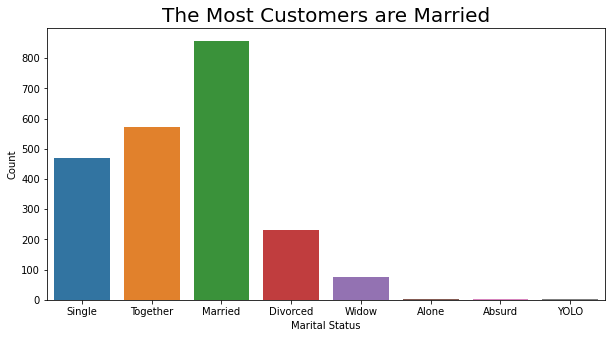

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Marital_Status", data=df)
plt.title("The Most Customers are Married", size=20)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.grid(False)
plt.show()

Text(1900, 120000, 'Outlier')

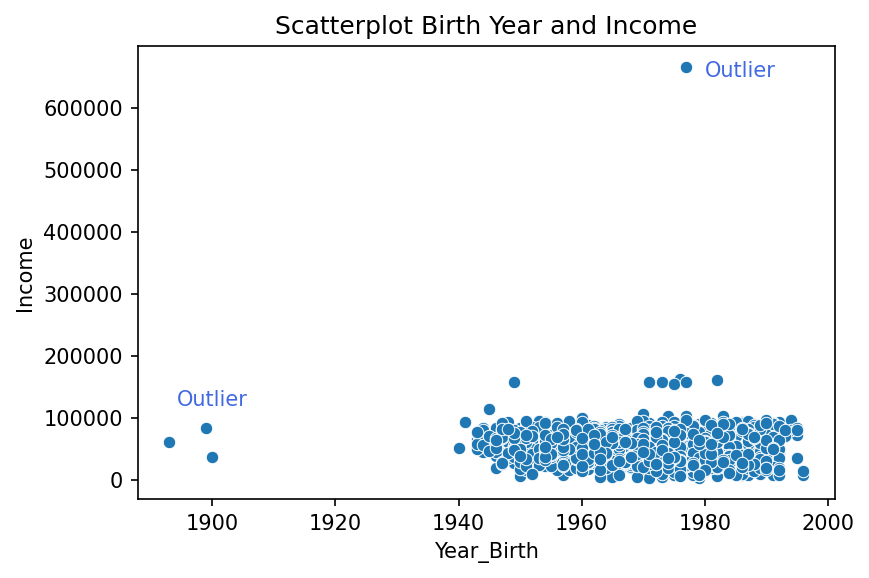

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x="Year_Birth", y="Income", data=df)
plt.title("Scatterplot Birth Year and Income")
plt.text(1980, 650000, "Outlier", color="royalblue")
plt.text(1900, 120000, "Outlier", color="royalblue", horizontalalignment="center")

The scatter plot above shows there are some outliers. It's hard to see the correlation between Year_Birth and Income because of these outliers, so I will exclude them.

In [ ]:
outlier_year = df.Year_Birth < 1940
outlier_income = df.Income > 200000

plt.figure(dpi=150)
sns.scatterplot(x="Year_Birth", y="Income", data=df[~outlier_income & ~outlier_year], color="gray")
sns.regplot(x="Year_Birth", y="Income", data=df[~outlier_income & ~outlier_year], scatter=False, line_kws=dict(linewidth=2), color="royalblue")
plt.xlabel("Year_Birth")
plt.ylabel("Income")
plt.title("Weak Negative Correlation \n Between Birth Year and Income", size=15)
plt.grid(False)
plt.show()

NameError: ignored

After exclude the outliers, the scatter plot above shows weak negative correlation between Year_Birth and Income. It means younger people have less income than older. I want see correlation between Income and Total Purchases. First, I have to create a new column that sums all the purchases, let's name it `NumTotalPurchases`.

In [ ]:
df["NumTotalPurchases"] = df["NumCatalogPurchases"] + df["NumDealsPurchases"] + df["NumWebPurchases"]

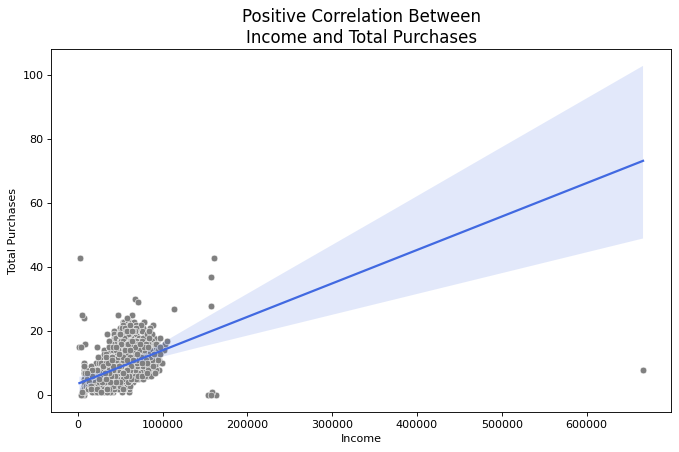

0.49309863600557086


In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x="Income", y="NumTotalPurchases", data=df, color="gray")
sns.regplot(
    x="Income", y="NumTotalPurchases", data=df, scatter=False, line_kws=dict(linewidth=2), color="royalblue"
)
plt.grid(False)
plt.xlabel("Income")
plt.ylabel("Total Purchases")
plt.title("Positive Correlation Between\nIncome and Total Purchases", size=15, loc='center')
plt.show()

corr = np.corrcoef(df['Income'], df['NumTotalPurchases'])
print(corr[0,1])

The scatter plot shows strong positive correlation, but correlation coefficient is around 0.49, which means the correlation is not so strong because it's still far from 1. Next I'll make box plot for Income from each Education level. Same like before, the box plot below have some outliers, I'll exclude them to get some information from it. 

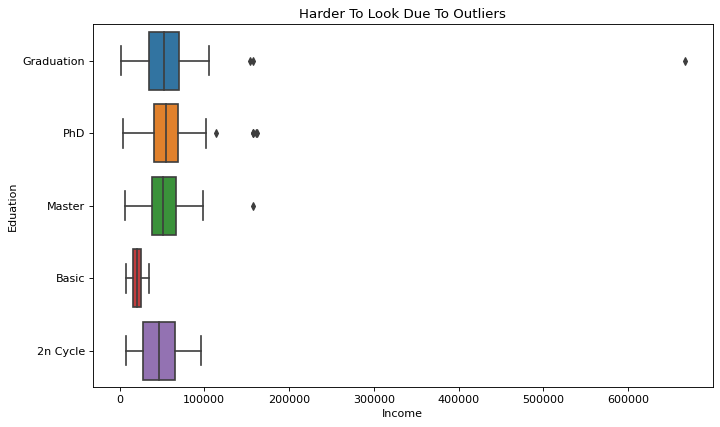

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x="Income",
    y="Education",
    data=df
)
plt.grid(False)
plt.xlabel("Income")
plt.xticks(size=10)
plt.ylabel("Eduation")
plt.title("Harder To Look Due To Outliers")
plt.show()

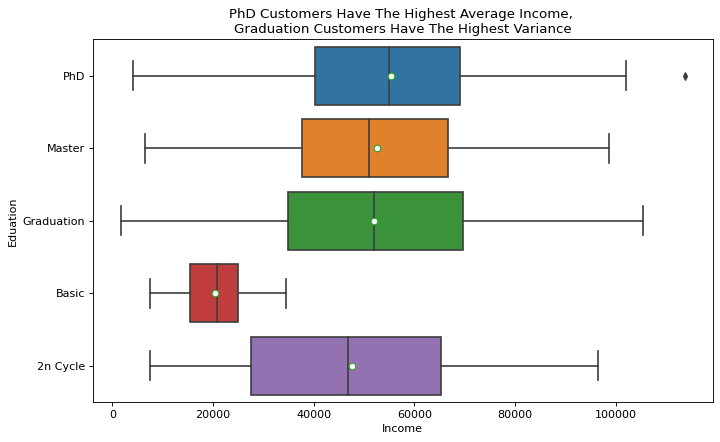

In [ ]:
df_no_outliers = df[
    df.Income < df.Income.quantile(.75) + 1.5*(df.Income.quantile(.75) - df.Income.quantile(.25))
]

plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x="Income",
    y="Education",
    data=df_no_outliers,
    showmeans=True, meanprops={"markerfacecolor": "white", "marker": "o"},
    order=["PhD", "Master", "Graduation", "Basic", "2n Cycle"]
)
plt.xlabel("Income")
plt.xticks(size=10)
plt.ylabel("Eduation")
plt.title(
    "PhD Customers Have The Highest Average Income, \nGraduation Customers Have The Highest Variance"
)
plt.show()

From the box plot above, it can be seen that customers with a PhD education have the highest average income compared to others, while the income with a Graduation educational background varies the most from the others. Meanwhile, Basic has the lowest average and variance of income. Then, I want to see correlation between Income and each Education level.

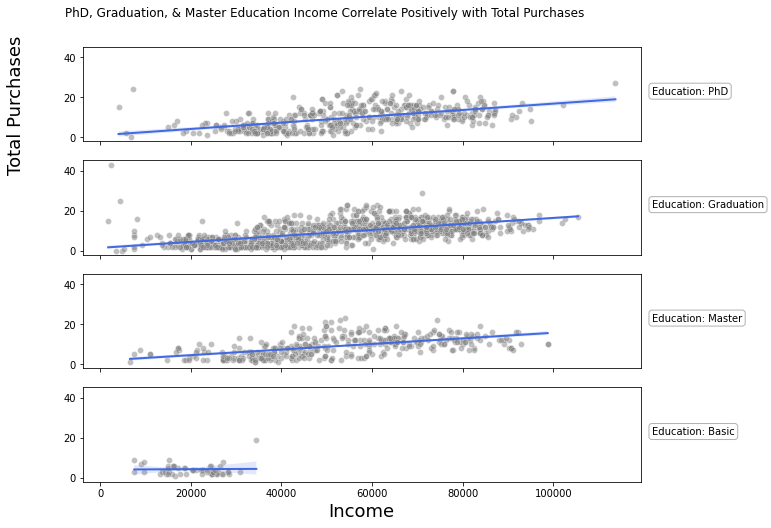

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True, sharey=True)
for axis, edu in zip(ax, ["PhD", "Graduation", "Master", "Basic"]):
    sns.scatterplot(
        x="Income",
        y="NumTotalPurchases",
        data=df_no_outliers[df_no_outliers.Education == edu],
        ax=axis,
        alpha=.5,
        color="gray"
    )
    sns.regplot(
        x="Income",
        y="NumTotalPurchases",
        data=df_no_outliers[df_no_outliers.Education == edu],
        ax=axis,
        scatter=False,
        line_kws=dict(linewidth=2), color="royalblue"
    )
    axis.annotate(
        "Education: "+ edu,
        xycoords="axes fraction",
        xy=(1.02, .5),
        bbox={"boxstyle": "round", "fc": "w", "alpha": .3}
    )
    axis.set_ylabel("")
    axis.grid(False)
fig.text(.02, .9, "Total Purchases", rotation="vertical", va="top", fontsize=18)
plt.xlabel("Income", fontsize=18)
plt.suptitle(
    "PhD, Graduation, & Master Education Income Correlate Positively with Total Purchases",
    x=0.1, y=.95, ha="left"
)
plt.show()

Based on the visualization above, the income of customers with educational backgrounds PhD, Graduation, and Master has a positive correlation to the number of purchases made, although not so strong compared to overall income.

Now, I want to know the character of customers who have bought some products through the web, store, and product catalogs that have been provided. I will compare the buyer's character on each channel.

In [ ]:
cust_no_purchases = df[df["NumTotalPurchases"] == 0]
cust_purchases = df[df["NumTotalPurchases"] > 0]

print("customers that don't purchase:", len(cust_no_purchases))
print("customers that purchase:", len(cust_purchases))

customers that don't purchase: 6
customers that purchase: 2210


It turns out that there are **6** customers ($0.3\%$) who never buy products. First, let's look at the purchase statistics on each channel using `.describe` and violin plot.

In [ ]:
channel_cols = ["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"]
cust_purchases[channel_cols].describe()

,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
count,2210.000000,2210.000000,2210.000000
mean,4.096380,5.815837,2.678281
std,2.736378,3.242573,2.927389
min,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000
50%,4.000000,5.000000,2.000000
75%,6.000000,8.000000,4.000000
max,27.000000,13.000000,28.000000


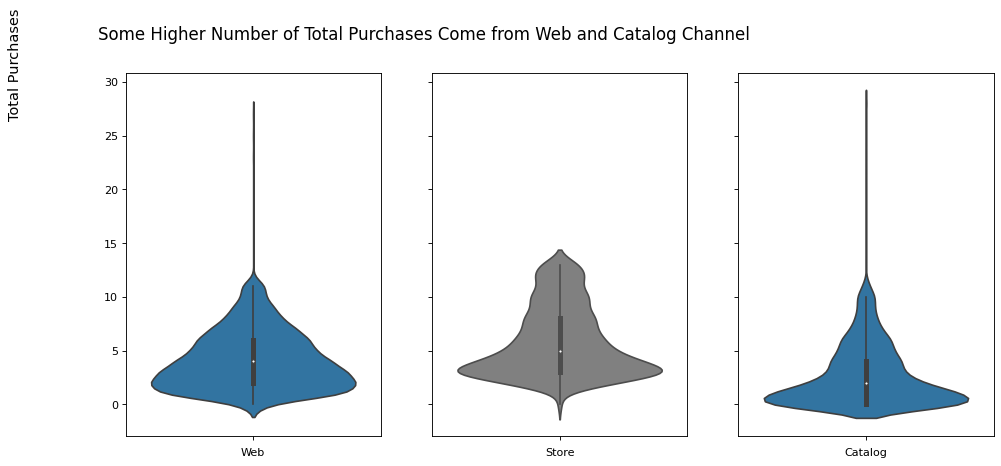

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6), dpi=80, sharey=True)
for channel, ax_channel  in zip(channel_cols, ax):
    if channel in ["NumWebPurchases", "NumCatalogPurchases"]:
        sns.violinplot(y=channel, data=cust_purchases, ax=ax_channel, showmeans=True)
    else:
        sns.violinplot(y=channel, data=cust_purchases, ax=ax_channel, color="gray", showmeans=True)
    ax_channel.set_ylabel("")
    ax_channel.grid(False)
ax[0].set_xlabel("Web")
ax[1].set_xlabel("Store")
ax[2].set_xlabel("Catalog")
fig.text(.02, .9, "Total Purchases", rotation="vertical", va="center", fontsize=13)
plt.suptitle(
    "Some Higher Number of Total Purchases Come from Web and Catalog Channel",
    x=.1, ha="left", size=15
)
plt.show()

It can be seen that the most purchases occur through **store**. Some purchases via web and catalog seem to have outliers, where there are customers who buy products in quantities that are far above others.

In [ ]:
def user_most_used_channel(channels: pd.Series):
    channel_name = ["Web", "Store", "Catalog"]
    return channel_name[np.argmax(channels)]

The function above will determine which channel is used the most to buy products compared to other channels that may have been used.

In [ ]:
cust_purchases["Channel"] = cust_purchases[channel_cols].apply(user_most_used_channel, axis=1).copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


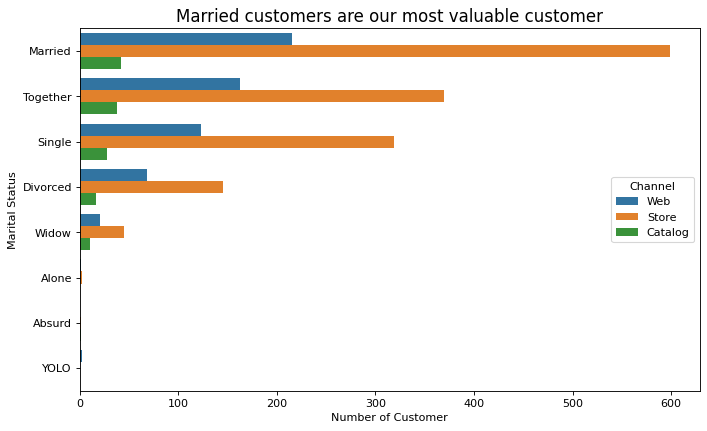

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(
    y="Marital_Status", data=cust_purchases, hue="Channel",
    order=cust_purchases.Marital_Status.value_counts().index, hue_order=["Web", "Store", "Catalog"]
)
plt.grid(False)
plt.xlabel("Number of Customer")
plt.ylabel("Marital Status")
plt.title("Married customers are our most valuable customer", size=15, loc="center")
plt.show()

From some of the visualizations above, we can conclude that married customers make purchases the most on various existing channels. There are some customers who make purchases in larger quantities than others via web and catalog.

## **5. Summary and Recommendation**

From the analysis that has been done, there are several findings:
* Customers with PhD background have the highest average income compared to customers with other backgrounds, followed by Masters, and Graduation.
* Customers with Graduation backgrounds have a fairly high income variance.
* Customer PhD, Master, and Graduation, have a positive correlation between their income and the number of purchases made. This means that the higher the customer's salary, the more purchases made.
* Of the many customers in the data, there are 0.3% customers who have never made a purchase.
* On average, most purchases come through the *store* channel
* In general, married customers are make purchases the most on various existing channels.
* There are some customers who make purchases in larger quantities than others via web and catalog.

Recommendation:
+ Customer with PhD background have the highest average income and income have positive correlation with number of purchases, we could offer the best quality products with high price to them. 
+ We need to dig further if we want to give special offers to customer with Graduation background, because they have the highest average income variance so they don't get the wrong target.
+ Considering there are still customers who never bought some products, we could make a promotion for their first purchase, like discount, free merchandize, voucher for next purchase or others.
+ Because most purchases come through the store, we have to monitoring the cleanliness, tidiness, good ambience, and convenience of the store.
+ Make some offer for married customers in web and catalog so we could increase sales from both channel.
